In [100]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
import tensorflow as tf
#import tensorflow_probability as tfp
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Normalization
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from keras.metrics import binary_crossentropy
from sklearn.preprocessing import MinMaxScaler

In [101]:
df = pd.read_csv("/Users/martinbordeau/Downloads/merged_data.csv", sep=",")

In [102]:
df

,Z,N,dz_BE/A,dz_ME,A,dz_BE,dz_S1n,dz_S1p,dz_S2p,dz_S2n,ame_ME,ame_BE/A,ame_AM,ame_BE,ame_S2p,ame_S2n,BE_diff_dz_ame
0,6,10,6.898167,14.077316,16,110.370667,4.507875,23.188839,42.117482,5.902274,13.694133,6.922055,16.014701,110.752874,42.188312,5.468396,0.382207
1,8,8,7.993990,-5.020561,16,127.903839,16.131404,12.683879,23.435447,29.960029,-4.737002,7.976207,15.994915,127.619315,16.866442,28.887419,-0.284524
2,7,9,7.419595,4.952110,16,118.713516,3.493556,12.850725,33.437960,13.427935,5.683907,7.373797,16.006102,117.980754,29.863098,13.322146,-0.732763
3,9,8,7.587443,1.185776,17,128.986529,17.576861,1.082690,13.766569,33.561636,1.951701,7.542328,17.002095,128.219583,4.353683,30.757687,-0.766946
4,5,12,5.179702,45.246765,17,88.054931,1.097350,21.801620,49.412617,0.873103,43.716322,5.269668,17.046931,89.584351,-21.840433,1.383694,1.529420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,101,158,7.410351,92.189087,259,1919.280857,6.798308,4.004679,10.395280,12.638872,93.564000,7.405000,259.100445,1917.895000,23.659000,11.575783,-1.385857
2989,100,160,7.411275,93.392090,260,1926.931601,6.506386,6.782535,12.039750,11.655423,95.766000,7.402000,260.102809,1924.520000,18.186087,10.676000,-2.411601
2990,101,159,7.403233,94.700806,260,1924.840593,5.559736,4.415378,10.772386,12.358044,96.550000,7.396000,260.103650,1922.960000,21.900000,11.267333,-1.880593
2991,101,160,7.399727,96.284058,261,1931.328713,6.488120,4.397112,11.179646,12.047856,98.578000,7.391000,261.105828,1929.051000,19.984568,11.156000,-2.277713


In [103]:
df['Vol']=np.power(df['A'],2/3)
df['Coul']= (df['Z']*(df['Z']-1))/np.power(df['A'],1/3)
df["Asym"] = ( (df["N"]-df["Z"])**2 ) / df["A"]
df["Pair"]= np.power(df["A"],-1/2)

In [104]:
df

,Z,N,dz_BE/A,dz_ME,A,dz_BE,dz_S1n,dz_S1p,dz_S2p,dz_S2n,...,ame_BE/A,ame_AM,ame_BE,ame_S2p,ame_S2n,BE_diff_dz_ame,Vol,Coul,Asym,Pair
0,6,10,6.898167,14.077316,16,110.370667,4.507875,23.188839,42.117482,5.902274,...,6.922055,16.014701,110.752874,42.188312,5.468396,0.382207,6.349604,11.905508,1.000000,0.250000
1,8,8,7.993990,-5.020561,16,127.903839,16.131404,12.683879,23.435447,29.960029,...,7.976207,15.994915,127.619315,16.866442,28.887419,-0.284524,6.349604,22.223615,0.000000,0.250000
2,7,9,7.419595,4.952110,16,118.713516,3.493556,12.850725,33.437960,13.427935,...,7.373797,16.006102,117.980754,29.863098,13.322146,-0.732763,6.349604,16.667711,0.250000,0.250000
3,9,8,7.587443,1.185776,17,128.986529,17.576861,1.082690,13.766569,33.561636,...,7.542328,17.002095,128.219583,4.353683,30.757687,-0.766946,6.611489,28.001601,0.058824,0.242536
4,5,12,5.179702,45.246765,17,88.054931,1.097350,21.801620,49.412617,0.873103,...,5.269668,17.046931,89.584351,-21.840433,1.383694,1.529420,6.611489,7.778222,2.882353,0.242536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,101,158,7.410351,92.189087,259,1919.280857,6.798308,4.004679,10.395280,12.638872,...,7.405000,259.100445,1917.895000,23.659000,11.575783,-1.385857,40.631842,1584.484952,12.544402,0.062137
2989,100,160,7.411275,93.392090,260,1926.931601,6.506386,6.782535,12.039750,11.655423,...,7.402000,260.102809,1924.520000,18.186087,10.676000,-2.411601,40.736361,1551.115289,13.846154,0.062017
2990,101,159,7.403233,94.700806,260,1924.840593,5.559736,4.415378,10.772386,12.358044,...,7.396000,260.103650,1922.960000,21.900000,11.267333,-1.880593,40.736361,1582.450951,12.938462,0.062017
2991,101,160,7.399727,96.284058,261,1931.328713,6.488120,4.397112,11.179646,12.047856,...,7.391000,261.105828,1929.051000,19.984568,11.156000,-2.277713,40.840746,1580.427355,13.337165,0.061898


In [105]:
target = df["ame_BE"]
n_input=df["N"]
z_input=df["Z"]
vol_input=df["Vol"]
coul_input=df["Coul"]
asym_input = df["Asym"]
pair_input = df["Pair"]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_n=scaler.fit_transform(pd.Series.to_numpy(n_input).reshape(-1,1))
scaled_z=scaler.fit_transform(pd.Series.to_numpy(z_input).reshape(-1,1))
scaled_vol=scaler.fit_transform(pd.Series.to_numpy(vol_input).reshape(-1,1))
scaled_coul=scaler.fit_transform(pd.Series.to_numpy(coul_input).reshape(-1,1))
scaled_asym = scaler.fit_transform(pd.Series.to_numpy(asym_input).reshape(-1,1))
scaled_pair = scaler.fit_transform(pd.Series.to_numpy(pair_input).reshape(-1,1))
scaled_target=scaler.fit_transform(pd.Series.to_numpy(target).reshape(-1,1))

In [106]:
input1=keras.layers.Input(shape=(1,))
input2=keras.layers.Input(shape=(1,))
input3=keras.layers.Input(shape=(1,))
input4=keras.layers.Input(shape=(1,))
input5=keras.layers.Input(shape=(1,))
input6=keras.layers.Input(shape=(1,))

merged = keras.layers.Concatenate()([input1, input2, input3, input4, input5, input6])
dense1 = keras.layers.Dense(128, input_dim=6, activation="relu")(merged)
dense2 = keras.layers.Dense(128, activation="relu")(dense1)
dense3 = keras.layers.Dense(128, activation="relu")(dense2)
dense4 = keras.layers.Dense(128, activation="relu")(dense3)
dense5 = keras.layers.Dense(128, activation="relu")(dense4)
dense6 = keras.layers.Dense(128, activation="relu")(dense5)
dense7 = keras.layers.Dense(128, activation="relu")(dense6)
dense8 = keras.layers.Dense(128, activation="relu")(dense7)
dense9 = keras.layers.Dense(128, activation="relu")(dense8)
output = keras.layers.Dense(1, activation="relu")(dense9)
model4 = keras.models.Model(([input1, input2, input3, input4, input5, input6]),output)

In [107]:
model4.compile(optimizer=Adam(learning_rate=0.000001), loss="mean_squared_error")

In [108]:
history4=model4.fit(x=(scaled_n,scaled_z,scaled_vol, scaled_coul, scaled_asym, scaled_pair), y=scaled_target, epochs=1000, shuffle=True, verbose=2)

plt.figure(figsize =(20,13))
plt.yscale('log')
plt.legend('labels')

plt.plot(history4.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

Epoch 1/1000
94/94 - 0s - loss: 0.3525 - 447ms/epoch - 5ms/step
Epoch 2/1000
94/94 - 0s - loss: 0.3475 - 118ms/epoch - 1ms/step
Epoch 3/1000
94/94 - 0s - loss: 0.3427 - 118ms/epoch - 1ms/step
Epoch 4/1000
94/94 - 0s - loss: 0.3378 - 119ms/epoch - 1ms/step
Epoch 5/1000
94/94 - 0s - loss: 0.3322 - 118ms/epoch - 1ms/step
Epoch 6/1000
94/94 - 0s - loss: 0.3260 - 117ms/epoch - 1ms/step
Epoch 7/1000
94/94 - 0s - loss: 0.3197 - 121ms/epoch - 1ms/step
Epoch 8/1000
94/94 - 0s - loss: 0.3133 - 118ms/epoch - 1ms/step
Epoch 9/1000
94/94 - 0s - loss: 0.3068 - 117ms/epoch - 1ms/step
Epoch 10/1000
94/94 - 0s - loss: 0.2999 - 131ms/epoch - 1ms/step
Epoch 11/1000
94/94 - 0s - loss: 0.2929 - 127ms/epoch - 1ms/step
Epoch 12/1000
94/94 - 0s - loss: 0.2856 - 118ms/epoch - 1ms/step
Epoch 13/1000
94/94 - 0s - loss: 0.2778 - 123ms/epoch - 1ms/step
Epoch 14/1000
94/94 - 0s - loss: 0.2698 - 128ms/epoch - 1ms/step
Epoch 15/1000
94/94 - 0s - loss: 0.2617 - 122ms/epoch - 1ms/step
Epoch 16/1000
94/94 - 0s - loss: 0

In [ ]:
test_target = df["ame_BE"]
test_n_input=df["N"]
test_z_input=df["Z"]
test_vol_input=df["Vol"]
test_coul_input=df["Coul"]
test_asym_input = df["Asym"]
test_pair_input = df["Pair"]

scaler=MinMaxScaler(feature_range=(0,1))
test_scaled_n=scaler.fit_transform(pd.Series.to_numpy(test_n_input).reshape(-1,1))
test_scaled_z=scaler.fit_transform(pd.Series.to_numpy(test_z_input).reshape(-1,1))
test_scaled_vol=scaler.fit_transform(pd.Series.to_numpy(vol_input).reshape(-1,1))
test_scaled_coul=scaler.fit_transform(pd.Series.to_numpy(coul_input).reshape(-1,1))
test_scaled_asym=scaler.fit_transform(pd.Series.to_numpy(test_asym_input).reshape(-1,1))
test_scaled_pair=scaler.fit_transform(pd.Series.to_numpy(test_pair_input).reshape(-1,1))
test_scaled_target=scaler.fit_transform(pd.Series.to_numpy(test_target).reshape(-1,1))
predictions = model4.predict(x=([test_scaled_n,test_scaled_z,test_scaled_vol,test_scaled_coul, test_scaled_asym, test_scaled_pair]), batch_size=1)

2993/2993 [==============================] - 1s 383us/step


<AxesSubplot:xlabel='A', ylabel='Difference (MeV)'>

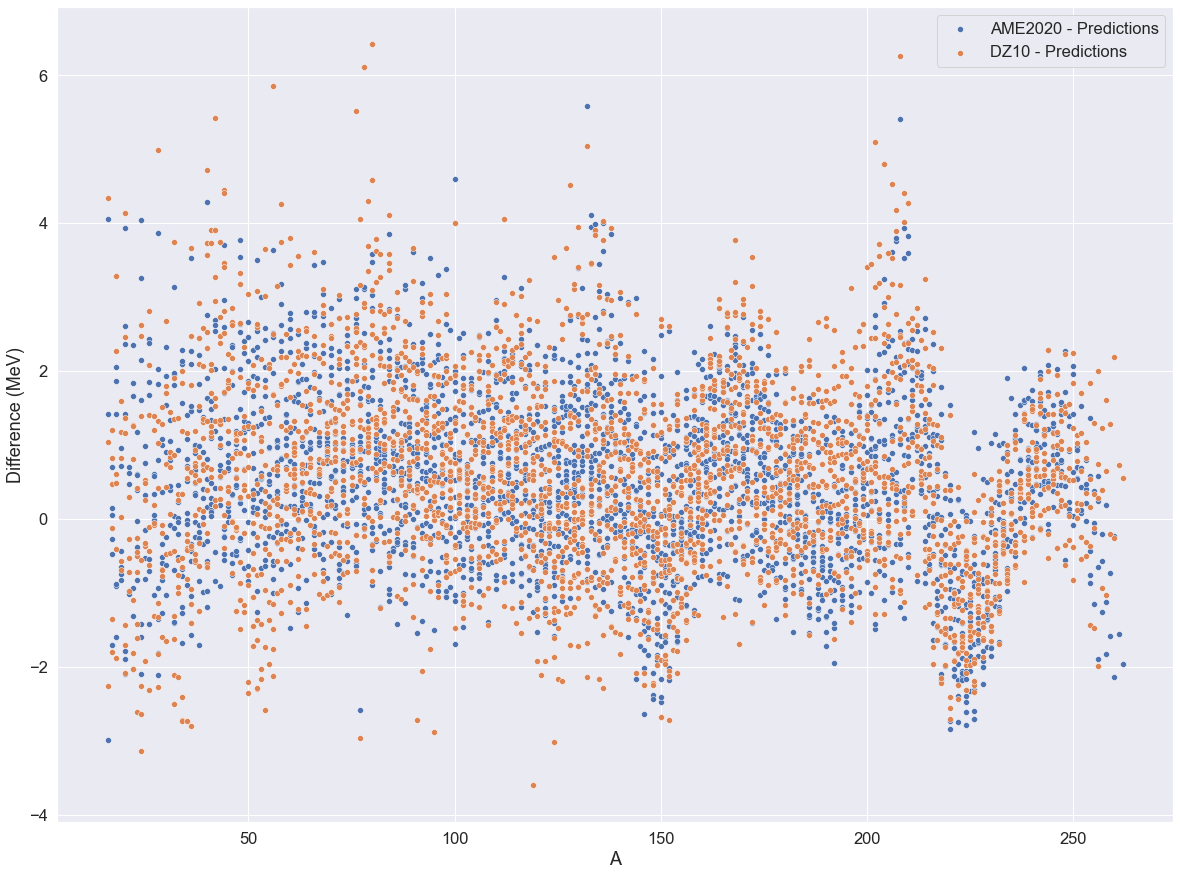

In [ ]:
rescaled_predictions=[(i - scaler.min_)/scaler.scale_ for i in predictions]


df["BE_Predictions"]=np.double(rescaled_predictions)
#df["BE/A_Predictions"]=df["BE/A_Predictions"]/1000
df["Difference_BE_AME"]=df["ame_BE"]-df["BE_Predictions"]
df["Difference_BE_DZ"]=df["dz_BE"]-df["BE_Predictions"]



plt.figure(figsize =(20,15))

#plt.title('Difference between ame_BE(exp) and BE_Predictions')
plt.ylabel('Difference (MeV)')

sns.scatterplot(x="A",y="Difference_BE_AME",data=df, palette="rainbow_r", label='AME2020 - Predictions')
sns.scatterplot(x="A",y="Difference_BE_DZ",data=df, palette="rainbow_r", label='DZ10 - Predictions')

In [ ]:


rms_ame = np.sqrt(((df['Difference_BE_AME'] ** 2).sum()) / len(df['Difference_BE_AME']))

print('RMS AME:', rms_ame)

RMS AME: 1.2731487962909183


In [ ]:
print(scaler.min_)

[-0.04856553]
